<a href="https://www.kaggle.com/code/gregoriusbayuaji/what-should-we-consider-when-we-bought-a-house?scriptVersionId=201354935" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/melb-data/melb_data.csv


If we want to buy or sell a house, we need to consider several aspects. Sometimes, we don't know how much effect these aspects have on the price of a house. That nescience may give us a bad decision. So, it's important for us if we can figure what aspects we need to know when we want to buy or sell a house.

# Data Describing

We took the data from Melbourne Housing Price. As you can see, there are so many variables about it. We're gonna choose what variables has the best effect on the house price.

In [2]:
df = pd.read_csv('../input/melb-data/melb_data.csv')
df.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  float64
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [4]:
df.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,18396.000000,18396.000000,1.839600e+04,18395.000000,18395.000000,14927.000000,14925.000000,14820.000000,13603.000000,7762.000000,8958.000000,15064.000000,15064.000000,18395.000000
mean,11826.787073,2.935040,1.056697e+06,10.389986,3107.140147,2.913043,1.538492,1.615520,558.116371,151.220219,1965.879996,-37.809849,144.996338,7517.975265
std,6800.710448,0.958202,6.419217e+05,6.009050,95.000995,0.964641,0.689311,0.955916,3987.326586,519.188596,37.013261,0.081152,0.106375,4488.416599
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,5936.750000,2.000000,6.330000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,176.500000,93.000000,1950.000000,-37.858100,144.931193,4294.000000
50%,11820.500000,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803625,145.000920,6567.000000
75%,17734.250000,3.000000,1.302000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,174.000000,2000.000000,-37.756270,145.060000,10331.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


## Notes on Specific Variables

Rooms: Number of rooms

Price: Price in dollars

Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size

BuildingArea: Building Size

CouncilArea: Governing council for the area

# Handling Missing Values

In [5]:
df.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

From the list above we can see that there are so many missing values. We will handle it one by one

### 1. Distance, Postcode, Regionname, and Propertycount

Because it has only 1 null values, we can just delete the row.

In [6]:
df.dropna(subset = ['Distance'], inplace = True)
df.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          3468
Bathroom          3470
Car               3575
Landsize          4792
BuildingArea     10633
YearBuilt         9437
CouncilArea       6162
Lattitude         3331
Longtitude        3331
Regionname           0
Propertycount        0
dtype: int64

Other column has more than 10% of null values, so we cannot just delete it. We need to analyze them. Let's start with the location. Lattitude and Longitude. See the rows when lattitude and longitude is null.

In [7]:
df[df['Lattitude'].isnull()]

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8,15,Abbotsford,217 Langridge St,3,h,1000000.0,S,Jellis,8/10/2016,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
9,16,Abbotsford,18a Mollison St,2,t,745000.0,S,Jellis,8/10/2016,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
12,19,Abbotsford,403/609 Victoria St,2,u,542000.0,S,Dingle,8/10/2016,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
13,21,Abbotsford,25/84 Trenerry Cr,2,u,760000.0,SP,Biggin,10/12/2016,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
14,22,Abbotsford,106/119 Turner St,1,u,481000.0,SP,Purplebricks,10/12/2016,2.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,23495,Templestowe Lower,1/207 Manningham Rd,2,u,550000.0,PI,Barry,26/08/2017,12.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Eastern Metropolitan,5420.0
18362,23499,Thornbury,1/128 Dundas St,2,t,770000.0,PI,McGrath,26/08/2017,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
18365,23502,Thornbury,111 Pender St,2,t,858000.0,S,Jellis,26/08/2017,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northern Metropolitan,8870.0
18366,23508,Toorak,21/1059 Malvern Rd,2,u,720000.0,VB,Beller,26/08/2017,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Southern Metropolitan,7217.0


In [8]:
df_null_latitude = df[df['Lattitude'].isnull()]

df_null_latitude.isnull().sum()

Unnamed: 0          0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2         3309
Bathroom         3309
Car              3309
Landsize         3309
BuildingArea     3322
YearBuilt        3323
CouncilArea      3309
Lattitude        3331
Longtitude       3331
Regionname          0
Propertycount       0
dtype: int64

It shows that almost all of the house has no other data when their lattitude and longitude is null. So, we can delete them

In [9]:
df.dropna(subset = ['Bathroom'], inplace = True)
df.isnull().sum()

Unnamed: 0          0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car               105
Landsize         1323
BuildingArea     7163
YearBuilt        5967
CouncilArea      2692
Lattitude          22
Longtitude         22
Regionname          0
Propertycount       0
dtype: int64

And lastly, Lattitude and Longitude columns isn't actually necessary for the data, because it has been represented by Suburb and Regionname data. So we can delete the column

In [10]:
LattitudeLongtitude = df[['Lattitude', 'Longtitude']]
df.drop(LattitudeLongtitude, axis = 1, inplace = True)

### 2. Cars

In [11]:
df.shape

(14925, 20)

From that data we can see that some house area has no data about car garage. Because of that, and also because the numbers of that kind of data is so small compared to the total numbers of the data, we can assumed that house is exist but has no car garage/car park.

In [12]:
df['Car'] = df['Car'].fillna(0)
df.isnull().sum()

Unnamed: 0          0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize         1323
BuildingArea     7163
YearBuilt        5967
CouncilArea      2692
Regionname          0
Propertycount       0
dtype: int64

### 3. Landsize, BuildingArea, YearBuilt, and CouncilArea

We can change the null values with the average value of those columns. But we need to see is there any outliers that makes the mean value goes wrong.

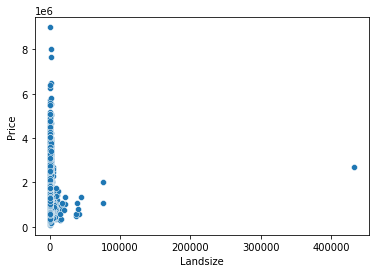

In [13]:
sns.scatterplot(data = df, x = 'Landsize', y = 'Price')
plt.show()

You can see, there's one house that has more than 40000 miles of landsize. It should be deleted

In [14]:
Building1 = df[df['Landsize'] > 400000].index
df.drop(Building1, inplace = True)

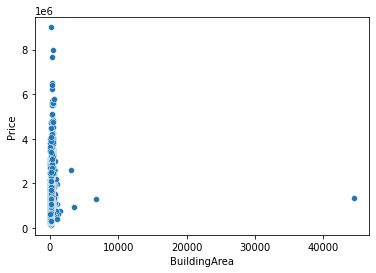

In [15]:
sns.scatterplot(data = df, x = 'BuildingArea', y = 'Price')
plt.show()

In [16]:
Building1 = df[df['BuildingArea'] > 40000].index
df.drop(Building1, inplace = True)

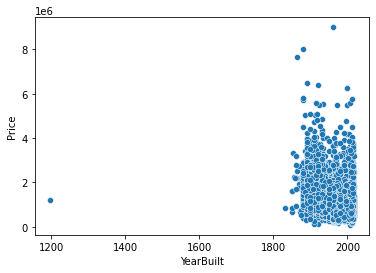

In [17]:
sns.scatterplot(data = df, x = 'YearBuilt', y = 'Price')
plt.show()

In [18]:
df.drop(df[df['YearBuilt'] < 1800].index, inplace = True)

In [19]:
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].mean())
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].mean())
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())

In [20]:
df.drop(df[['CouncilArea']], axis = 1, inplace = True)

The final numbers of non-null data can be shown below

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14922 entries, 0 to 18395
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     14922 non-null  int64  
 1   Suburb         14922 non-null  object 
 2   Address        14922 non-null  object 
 3   Rooms          14922 non-null  int64  
 4   Type           14922 non-null  object 
 5   Price          14922 non-null  float64
 6   Method         14922 non-null  object 
 7   SellerG        14922 non-null  object 
 8   Date           14922 non-null  object 
 9   Distance       14922 non-null  float64
 10  Postcode       14922 non-null  float64
 11  Bedroom2       14922 non-null  float64
 12  Bathroom       14922 non-null  float64
 13  Car            14922 non-null  float64
 14  Landsize       14922 non-null  float64
 15  BuildingArea   14922 non-null  float64
 16  YearBuilt      14922 non-null  float64
 17  Regionname     14922 non-null  object 
 18  Proper

# Data Cleansing

### 1. Outlier

In [22]:
df.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,14922.000000,14922.000000,1.492200e+04,14922.000000,14922.000000,14922.000000,14922.000000,14922.000000,14922.000000,14922.000000,14922.000000,14922.000000
mean,12110.048921,2.934258,1.066963e+06,10.307680,3107.141335,2.912746,1.538333,1.603806,523.079712,145.507647,1965.965948,7473.985257
std,6859.184436,0.955708,6.381745e+05,6.054752,94.537468,0.964499,0.689159,0.961552,1352.376419,91.025827,27.976148,4386.739708
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1830.000000,249.000000
25%,6156.250000,2.000000,6.410000e+05,6.200000,3046.000000,2.000000,1.000000,1.000000,196.000000,123.000000,1960.000000,4380.000000
50%,12119.500000,3.000000,9.000000e+05,9.300000,3085.000000,3.000000,1.000000,2.000000,504.000000,145.507647,1965.965948,6567.000000
75%,18229.750000,3.000000,1.320000e+06,13.100000,3149.000000,3.000000,2.000000,2.000000,637.000000,145.507647,1975.000000,10331.000000
max,23546.000000,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,76000.000000,6791.000000,2018.000000,21650.000000


From the table, we can see that there are no possible outliers

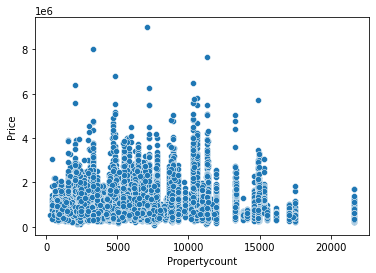

In [23]:
sns.scatterplot(data = df, x = 'Propertycount', y = 'Price')
plt.show()

In [24]:
df.drop(df[df['Propertycount'] > 20000].index, inplace = True)

### 2. Multivariate Data

In [25]:
Unclear = df[['Unnamed: 0', 'Date', 'Address', 'Postcode']]
df.drop(Unclear, axis = 1, inplace = True)

We drop 'Unnamed: 0' and 'Address' because their values are different in every house. I also drop 'Date' because 'Date' value can't be encoded, and it also has too many variance.

### 3. Tiered Data

From the missing value handling, we can say that there's no tiered data anymore because of the latitude and longitude data has ben dropped

### 4. Multicollinerarity

The last thing we need to consider when do data cleansing is multicollinearity.

In [26]:
corrmat = df.corr()

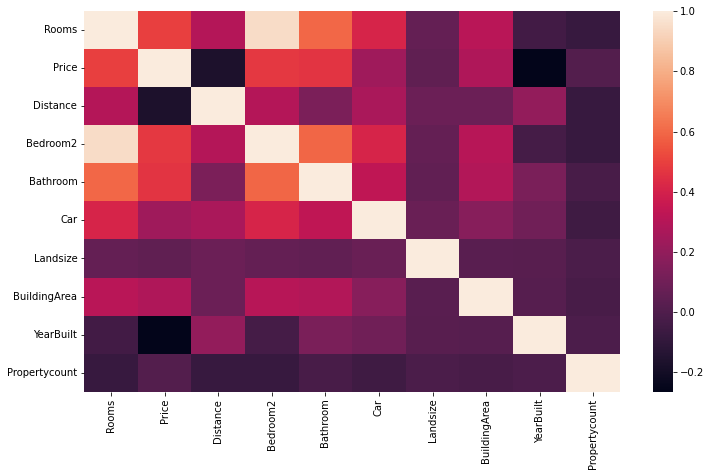

In [27]:
plt.figure(figsize = (12,7))
sns.heatmap(corrmat)
plt.show()

From the heatmap above we can see that there is also a collinerarity between 'Rooms' and 'Bedroom2'. So we need to drop one of them, because people usually asking how many bedrooms does a house have, we drop 'Rooms'

In [28]:
df.drop(df[['Rooms']], axis = 1, inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14531 entries, 0 to 18395
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         14531 non-null  object 
 1   Type           14531 non-null  object 
 2   Price          14531 non-null  float64
 3   Method         14531 non-null  object 
 4   SellerG        14531 non-null  object 
 5   Distance       14531 non-null  float64
 6   Bedroom2       14531 non-null  float64
 7   Bathroom       14531 non-null  float64
 8   Car            14531 non-null  float64
 9   Landsize       14531 non-null  float64
 10  BuildingArea   14531 non-null  float64
 11  YearBuilt      14531 non-null  float64
 12  Regionname     14531 non-null  object 
 13  Propertycount  14531 non-null  float64
dtypes: float64(9), object(5)
memory usage: 1.7+ MB


# Feature Encoding



In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14531 entries, 0 to 18395
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         14531 non-null  object 
 1   Type           14531 non-null  object 
 2   Price          14531 non-null  float64
 3   Method         14531 non-null  object 
 4   SellerG        14531 non-null  object 
 5   Distance       14531 non-null  float64
 6   Bedroom2       14531 non-null  float64
 7   Bathroom       14531 non-null  float64
 8   Car            14531 non-null  float64
 9   Landsize       14531 non-null  float64
 10  BuildingArea   14531 non-null  float64
 11  YearBuilt      14531 non-null  float64
 12  Regionname     14531 non-null  object 
 13  Propertycount  14531 non-null  float64
dtypes: float64(9), object(5)
memory usage: 1.7+ MB


From the list above we can see that there are still 6 object variables. So, we need to encode them to figure out their collinearity to the 'Price'.

In [31]:
x_df = df.drop('Price', axis = 1)
y_df = df.Price

### 1. Type

In [32]:
df['Type'].value_counts()

h    9976
u    3318
t    1237
Name: Type, dtype: int64

In [33]:
dummy1 = pd.get_dummies(x_df['Type'])
x_df = x_df.join(dummy1)

In [34]:
x_df.drop('Type', axis = 1, inplace = True)

In [35]:
x_df.head()

,Suburb,Method,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,h,t,u
0,Abbotsford,S,Biggin,2.5,2.0,1.0,1.0,202.0,145.507647,1965.965948,Northern Metropolitan,4019.0,1,0,0
1,Abbotsford,S,Biggin,2.5,2.0,1.0,0.0,156.0,79.000000,1900.000000,Northern Metropolitan,4019.0,1,0,0
2,Abbotsford,SP,Biggin,2.5,3.0,2.0,0.0,134.0,150.000000,1900.000000,Northern Metropolitan,4019.0,1,0,0
3,Abbotsford,PI,Biggin,2.5,3.0,2.0,1.0,94.0,145.507647,1965.965948,Northern Metropolitan,4019.0,1,0,0
4,Abbotsford,VB,Nelson,2.5,3.0,1.0,2.0,120.0,142.000000,2014.000000,Northern Metropolitan,4019.0,1,0,0


### 2. Method

In [36]:
df['Method'].value_counts()

S     9620
SP    1845
PI    1645
VB    1322
SA      99
Name: Method, dtype: int64

In [37]:
dummy2 = pd.get_dummies(x_df['Method'])
x_df = x_df.join(dummy2)

In [38]:
x_df.drop('Method', axis = 1, inplace = True)

In [39]:
x_df.head()

,Suburb,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount,h,t,u,PI,S,SA,SP,VB
0,Abbotsford,Biggin,2.5,2.0,1.0,1.0,202.0,145.507647,1965.965948,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
1,Abbotsford,Biggin,2.5,2.0,1.0,0.0,156.0,79.000000,1900.000000,Northern Metropolitan,4019.0,1,0,0,0,1,0,0,0
2,Abbotsford,Biggin,2.5,3.0,2.0,0.0,134.0,150.000000,1900.000000,Northern Metropolitan,4019.0,1,0,0,0,0,0,1,0
3,Abbotsford,Biggin,2.5,3.0,2.0,1.0,94.0,145.507647,1965.965948,Northern Metropolitan,4019.0,1,0,0,1,0,0,0,0
4,Abbotsford,Nelson,2.5,3.0,1.0,2.0,120.0,142.000000,2014.000000,Northern Metropolitan,4019.0,1,0,0,0,0,0,0,1


### 3. Regionname

In [40]:
df['Regionname'].value_counts()

Southern Metropolitan         5104
Northern Metropolitan         3861
Western Metropolitan          3190
Eastern Metropolitan          1663
South-Eastern Metropolitan     558
Eastern Victoria                65
Northern Victoria               51
Western Victoria                39
Name: Regionname, dtype: int64

In [41]:
dummy3 = pd.get_dummies(x_df['Regionname'])
x_df = x_df.join(dummy3)

In [42]:
x_df.drop('Regionname', axis = 1, inplace = True)

In [43]:
x_df.head()

,Suburb,SellerG,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,...,SP,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,Abbotsford,Biggin,2.5,2.0,1.0,1.0,202.0,145.507647,1965.965948,4019.0,...,0,0,0,0,1,0,0,0,0,0
1,Abbotsford,Biggin,2.5,2.0,1.0,0.0,156.0,79.000000,1900.000000,4019.0,...,0,0,0,0,1,0,0,0,0,0
2,Abbotsford,Biggin,2.5,3.0,2.0,0.0,134.0,150.000000,1900.000000,4019.0,...,1,0,0,0,1,0,0,0,0,0
3,Abbotsford,Biggin,2.5,3.0,2.0,1.0,94.0,145.507647,1965.965948,4019.0,...,0,0,0,0,1,0,0,0,0,0
4,Abbotsford,Nelson,2.5,3.0,1.0,2.0,120.0,142.000000,2014.000000,4019.0,...,0,1,0,0,1,0,0,0,0,0


### 4. SellerG

In [44]:
df['SellerG'].value_counts()

Nelson           1599
Jellis           1457
hockingstuart    1249
Barry            1014
Marshall          718
                 ... 
Johnston            1
Hayeswinckle        1
Clairmont           1
iProperty           1
Point               1
Name: SellerG, Length: 283, dtype: int64

In [45]:
x_df['target'] = y_df
target_mapper = x_df.groupby('SellerG')['target'].mean().to_dict()

In [46]:
x_df['Seller_enc'] = x_df['SellerG'].map(target_mapper)

In [47]:
x_df.drop('target', axis = 1, inplace = True)
x_df.drop('SellerG', axis = 1, inplace = True)

In [48]:
x_df.head()

,Suburb,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,h,...,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,Seller_enc
0,Abbotsford,2.5,2.0,1.0,1.0,202.0,145.507647,1965.965948,4019.0,1,...,0,0,0,1,0,0,0,0,0,1.015546e+06
1,Abbotsford,2.5,2.0,1.0,0.0,156.0,79.000000,1900.000000,4019.0,1,...,0,0,0,1,0,0,0,0,0,1.015546e+06
2,Abbotsford,2.5,3.0,2.0,0.0,134.0,150.000000,1900.000000,4019.0,1,...,0,0,0,1,0,0,0,0,0,1.015546e+06
3,Abbotsford,2.5,3.0,2.0,1.0,94.0,145.507647,1965.965948,4019.0,1,...,0,0,0,1,0,0,0,0,0,1.015546e+06
4,Abbotsford,2.5,3.0,1.0,2.0,120.0,142.000000,2014.000000,4019.0,1,...,1,0,0,1,0,0,0,0,0,1.034330e+06


### 5. Suburb

In [49]:
df['Suburb'].value_counts()

Richmond          280
Bentleigh East    274
Preston           251
Brunswick         249
Essendon          234
                 ... 
Wonga Park          1
Healesville         1
Rockbank            1
Montrose            1
Monbulk             1
Name: Suburb, Length: 317, dtype: int64

In [50]:
x_df['target'] = y_df
target_mapper = x_df.groupby('Suburb')['target'].mean().to_dict()

In [51]:
x_df['Suburb_enc'] = x_df['Suburb'].map(target_mapper)

In [52]:
x_df.drop('target', axis = 1, inplace = True)
x_df.drop('Suburb', axis = 1, inplace = True)

In [53]:
x_df.head()

,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,h,t,...,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,Seller_enc,Suburb_enc
0,2.5,2.0,1.0,1.0,202.0,145.507647,1965.965948,4019.0,1,0,...,0,0,1,0,0,0,0,0,1.015546e+06,1.060718e+06
1,2.5,2.0,1.0,0.0,156.0,79.000000,1900.000000,4019.0,1,0,...,0,0,1,0,0,0,0,0,1.015546e+06,1.060718e+06
2,2.5,3.0,2.0,0.0,134.0,150.000000,1900.000000,4019.0,1,0,...,0,0,1,0,0,0,0,0,1.015546e+06,1.060718e+06
3,2.5,3.0,2.0,1.0,94.0,145.507647,1965.965948,4019.0,1,0,...,0,0,1,0,0,0,0,0,1.015546e+06,1.060718e+06
4,2.5,3.0,1.0,2.0,120.0,142.000000,2014.000000,4019.0,1,0,...,0,0,1,0,0,0,0,0,1.034330e+06,1.060718e+06


# Correlation Matrix

In [54]:
def tree_based_feature_importance(x_df,y_df):
    from sklearn.ensemble import RandomForestClassifier
    # create the random forest model
    model = RandomForestClassifier()

    # fit the model to start training.
    model.fit(x_df, y_df)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_df.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_df.columns).nlargest(6).plot(kind='barh')  
    return final_df

In [ ]:
feature_importance = tree_based_feature_importance(x_df,y_df)

In [ ]:
display(feature_importance)

From the graph above we can see that top correlated variables are Building Area, Landsize, Year Built, Seller, Distance, and Suburb.


That's the variables that we need to consider when we are going to buy a home. Thank you very much.